In [1]:
import pandas as pd 
import numpy as np
import category_encoders as ce
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px
import plotly.io as pio
import os

os.chdir("..")
from utils import null_checker, countplot_annot_hue

In [2]:
os.chdir("data")
df = pd.read_csv("Automobile_data.csv", na_values="?")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  164 non-null    float64
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       203 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

In [3]:
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


In [4]:
null_checker(df)

,null (sum),null (%)
normalized-losses,41,20.00
price,4,1.95
stroke,4,1.95
bore,4,1.95
peak-rpm,2,0.98
num-of-doors,2,0.98
horsepower,2,0.98
engine-type,0,0.00
highway-mpg,0,0.00
city-mpg,0,0.00


In [5]:
# Drop row with missing value of price
df = df[~df["price"].isna()]
null_checker(df)

,null (sum),null (%)
normalized-losses,37,18.41
stroke,4,1.99
bore,4,1.99
peak-rpm,2,1.00
num-of-doors,2,1.00
horsepower,2,1.00
symboling,0,0.00
engine-type,0,0.00
highway-mpg,0,0.00
city-mpg,0,0.00


In [6]:
df.drop(columns="normalized-losses", inplace=True)

In [7]:
df.describe()

,symboling,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
count,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,197.000000,197.000000,201.000000,199.000000,199.000000,201.000000,201.000000,201.000000
mean,0.840796,98.797015,174.200995,65.889055,53.766667,2555.666667,126.875622,3.330711,3.256904,10.164279,103.396985,5117.587940,25.179104,30.686567,13207.129353
std,1.254802,6.066366,12.322175,2.101471,2.447822,517.296727,41.546834,0.270793,0.319256,4.004965,37.553843,480.521824,6.423220,6.815150,7947.066342
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,94.500000,166.800000,64.100000,52.000000,2169.000000,98.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7775.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,2.000000,102.400000,183.500000,66.600000,55.500000,2926.000000,141.000000,3.590000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16500.000000
max,3.000000,120.900000,208.100000,72.000000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,262.000000,6600.000000,49.000000,54.000000,45400.000000


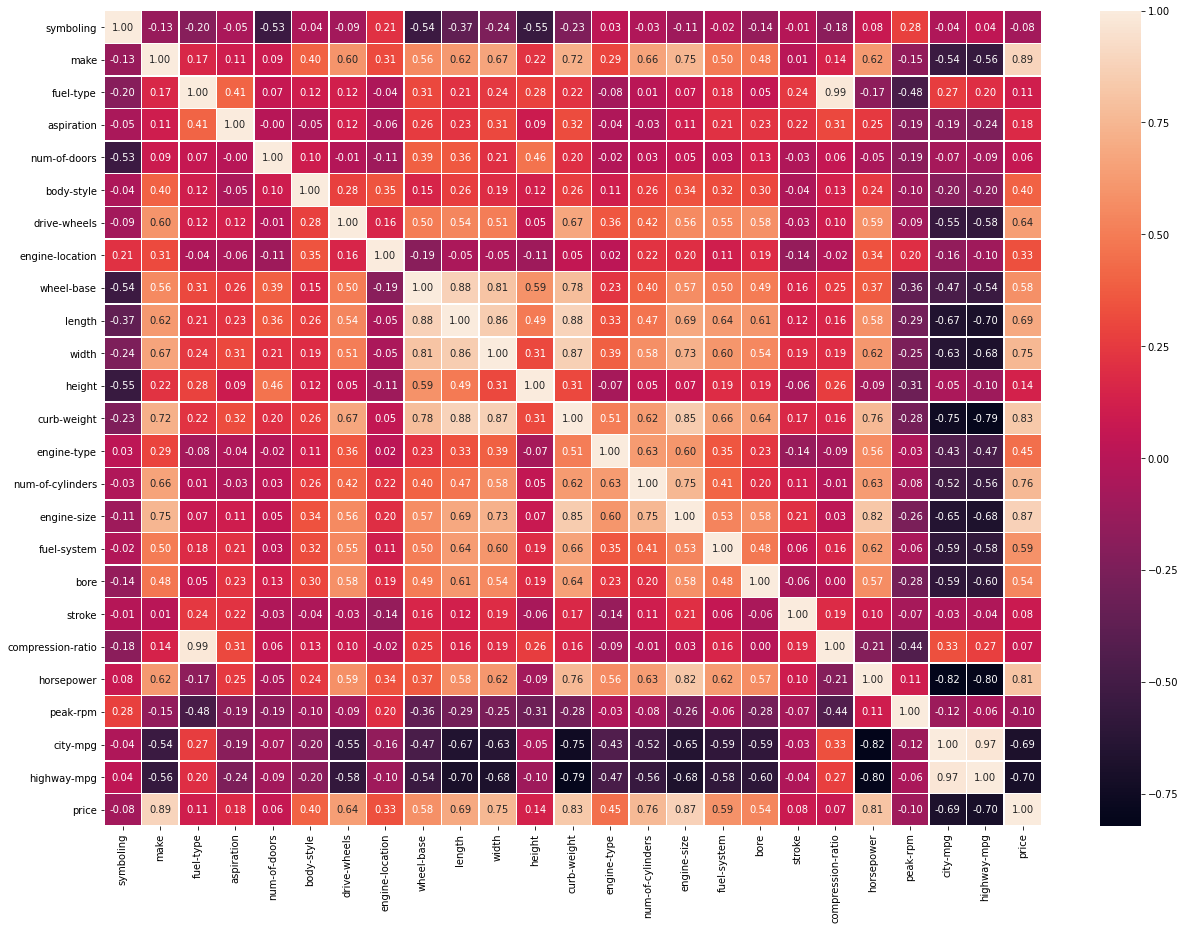

In [8]:
t_encoder = ce.TargetEncoder()
df_temp = t_encoder.fit_transform(df.drop(columns=["price"]), df["price"])
df_temp = pd.concat([df_temp, df["price"]], axis=1)

plt.figure(figsize=(14*1.5, 10*1.5))
sns.heatmap(df_temp.corr(), annot=True, linewidths=0.5, fmt=".2f")
plt.show()

In [9]:
df_temp.corr()["price"].sort_values(ascending=False).index

Index(['price', 'make', 'engine-size', 'curb-weight', 'horsepower',
       'num-of-cylinders', 'width', 'length', 'drive-wheels', 'fuel-system',
       'wheel-base', 'bore', 'engine-type', 'body-style', 'engine-location',
       'aspiration', 'height', 'fuel-type', 'stroke', 'compression-ratio',
       'num-of-doors', 'symboling', 'peak-rpm', 'city-mpg', 'highway-mpg'],
      dtype='object')

In [10]:
df.describe()

,symboling,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
count,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,197.000000,197.000000,201.000000,199.000000,199.000000,201.000000,201.000000,201.000000
mean,0.840796,98.797015,174.200995,65.889055,53.766667,2555.666667,126.875622,3.330711,3.256904,10.164279,103.396985,5117.587940,25.179104,30.686567,13207.129353
std,1.254802,6.066366,12.322175,2.101471,2.447822,517.296727,41.546834,0.270793,0.319256,4.004965,37.553843,480.521824,6.423220,6.815150,7947.066342
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,94.500000,166.800000,64.100000,52.000000,2169.000000,98.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7775.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,2.000000,102.400000,183.500000,66.600000,55.500000,2926.000000,141.000000,3.590000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16500.000000
max,3.000000,120.900000,208.100000,72.000000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,262.000000,6600.000000,49.000000,54.000000,45400.000000


In [11]:
df.select_dtypes("object")

,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,engine-type,num-of-cylinders,fuel-system
0,alfa-romero,gas,std,two,convertible,rwd,front,dohc,four,mpfi
1,alfa-romero,gas,std,two,convertible,rwd,front,dohc,four,mpfi
2,alfa-romero,gas,std,two,hatchback,rwd,front,ohcv,six,mpfi
3,audi,gas,std,four,sedan,fwd,front,ohc,four,mpfi
4,audi,gas,std,four,sedan,4wd,front,ohc,five,mpfi
...,...,...,...,...,...,...,...,...,...,...
200,volvo,gas,std,four,sedan,rwd,front,ohc,four,mpfi
201,volvo,gas,turbo,four,sedan,rwd,front,ohc,four,mpfi
202,volvo,gas,std,four,sedan,rwd,front,ohcv,six,mpfi
203,volvo,diesel,turbo,four,sedan,rwd,front,ohc,six,idi


In [12]:
# Create a list of float colums to check for skewing
mask = df.dtypes == np.float
float_cols = df.columns[mask]

skew_limit = 1 # define a limit above which we will log transform
skew_vals = df[float_cols].skew()

# Showing the skewed columns
skew_cols = (skew_vals
             .sort_values(ascending=False)
             .to_frame()
             .rename(columns={0:'Skew'})
             .query('abs(Skew) > {}'.format(skew_limit)))

skew_cols

,Skew
compression-ratio,2.584462
price,1.809675
horsepower,1.141584
wheel-base,1.031261


In [13]:
sns.set(style='darkgrid', palette='muted')

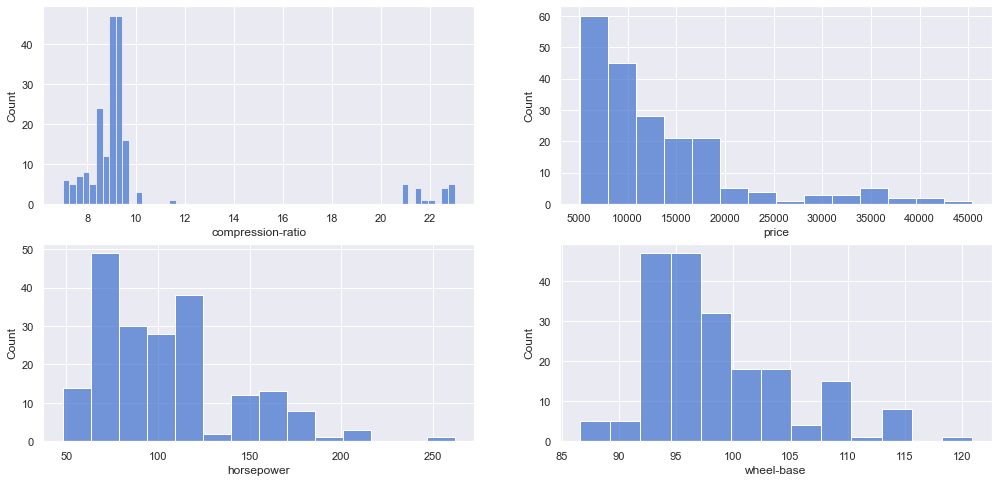

In [14]:
plt.figure(figsize=(17,8))
for i, col in enumerate(skew_cols.index):
    plt.subplot(2,2,i+1)
    sns.histplot(data=df, x=col)

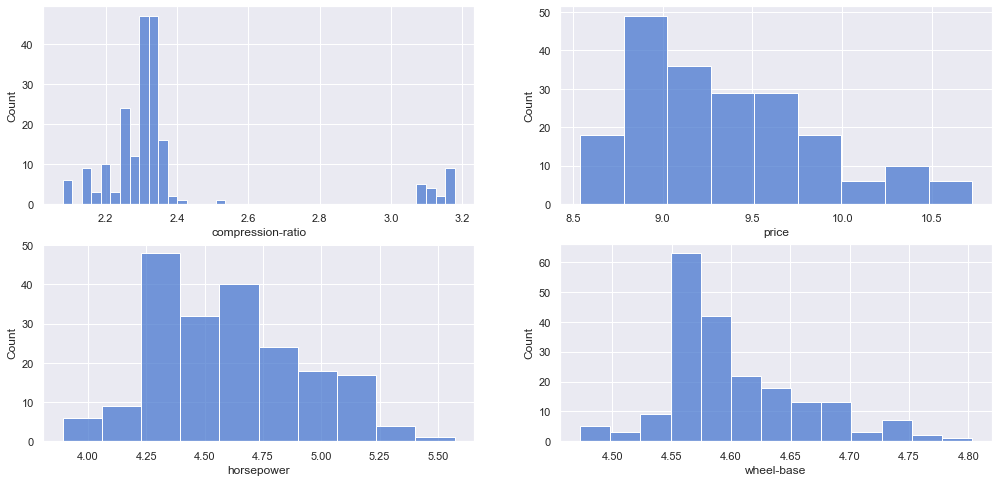

In [15]:
plt.figure(figsize=(17,8))
for i, col in enumerate(skew_cols.index):
    plt.subplot(2,2,i+1)
    sns.histplot(data=np.log1p(df.select_dtypes("float64")), x=col)

In [16]:
df.select_dtypes("object").columns

Index(['make', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style',
       'drive-wheels', 'engine-location', 'engine-type', 'num-of-cylinders',
       'fuel-system'],
      dtype='object')

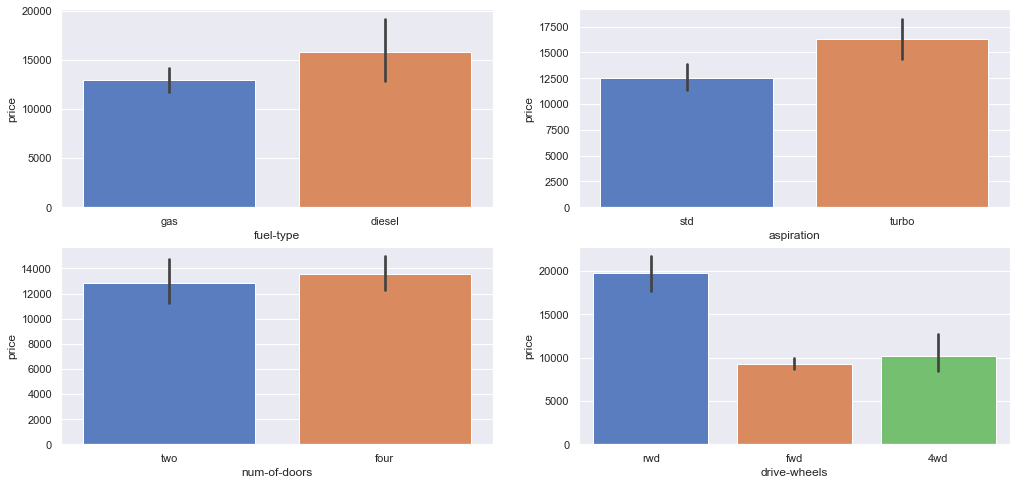

In [19]:
cat_cols = ['fuel-type', 'aspiration', 'num-of-doors', 'drive-wheels']
plt.figure(figsize=(17,8))
for i, col in enumerate(cat_cols):
    plt.subplot(2,2,i+1)
    sns.barplot(data=df, x=col, y="price") 

In [23]:
diesel_car = df[df["fuel-type"]=="diesel"]
gas_car = df[df["fuel-type"]=="gas"]

In [27]:
import scipy.stats as st

ttest = st.ttest_ind(a = diesel_car['price'], b = gas_car['price'])
p_value = ttest.pvalue
print('P-Value :',p_value)
if p_value >= 0.05:
    print('Car with a fuel-type diesel has the same average price as a gas car.')
else:
    print('Car with a fuel-type diesel has an average price that is different from gas car.')

P-Value : 0.1189625443809135
Car with a fuel-type diesel has the same average price as a gas car.
